In [1]:
import numpy as np
import pandas as pd
import openturns as ot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
N = int(1e3)
x_sample = ot.Normal([2., 2.], [0.8] * 2).getSample(N)
df = pd.DataFrame(np.array(x_sample), columns=['x1', 'x2'])
rdf = df.rank() / N
df['y'] = (df['x1'] - df['x2']) ** 2 - 8 * (df['x1'] + df['x2'] - 5)
df['fail'] = df['y'] < 0
rdf['fail'] = df['fail']

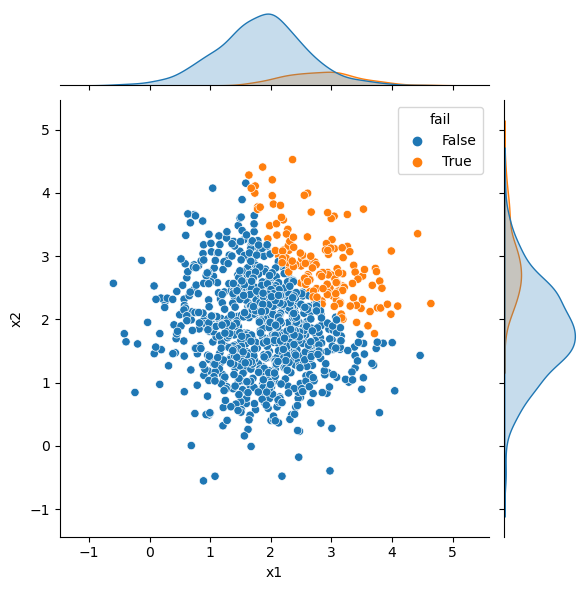

In [3]:
sns.jointplot(df, x='x1', y='x2', hue='fail');

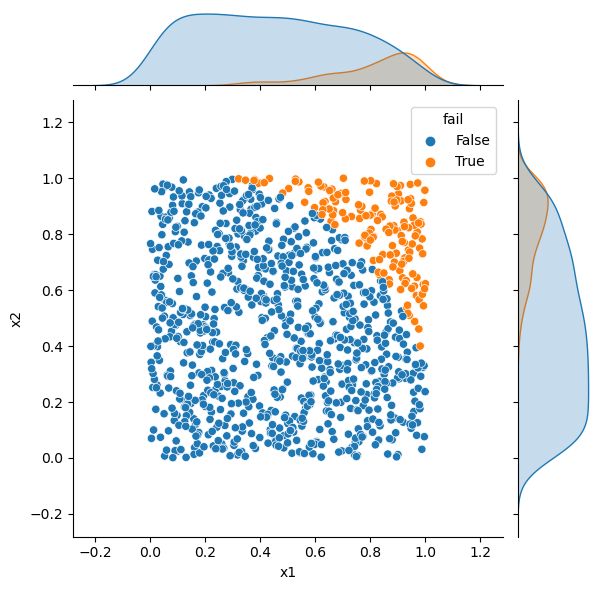

In [4]:
sns.jointplot(rdf, x='x1', y='x2', hue='fail');

In [5]:
failed_rsample = ot.Sample(rdf[rdf['fail']==1][['x1', 'x2']].values)

In [6]:
grid_size = 100
lowerbound = [0.0] * 2
upperbound = [1.0] * 2
mesher = ot.IntervalMesher([grid_size-1] * 2)
interval = ot.Interval(lowerbound, upperbound)
mesh = mesher.build(interval)
nodes = mesh.getVertices()
X0, X1 = np.array(nodes).T.reshape(2, grid_size, grid_size)

In [7]:
empirical_conditional_copula = np.array([[failed_rsample.computeEmpiricalCDF(n) for n in nodes]]).reshape(grid_size, grid_size)

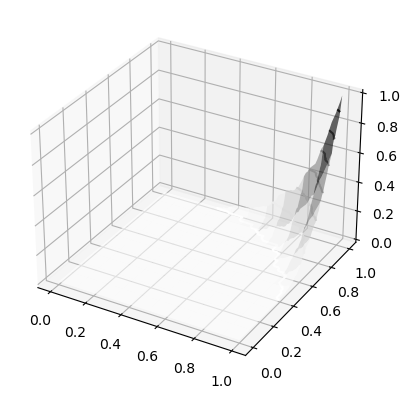

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X0, X1, empirical_conditional_copula, cmap='Greys', alpha=0.6, rstride=10)
ax.contour(X0, X1, empirical_conditional_copula, cmap='Greys');        

(0.0, 1.0)

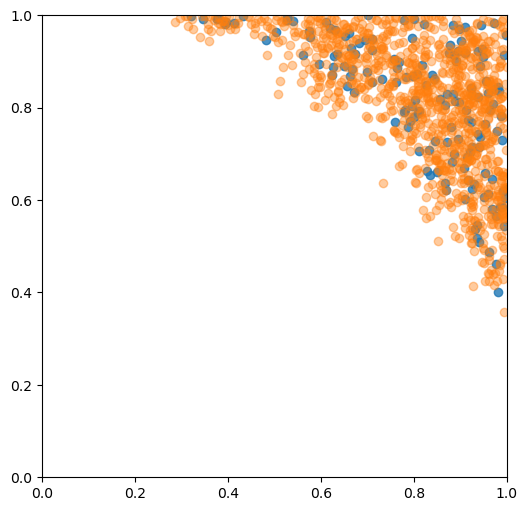

In [9]:
failed_copula = ot.EmpiricalBernsteinCopula(failed_rsample, 100, True)
ebc_sample = failed_copula.getSample(1000)
plt.figure(figsize=(6,6))
plt.scatter(failed_rsample[:, 0], failed_rsample[:, 1], alpha=0.8)
plt.scatter(ebc_sample[:, 0], ebc_sample[:, 1], alpha=0.4)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [18]:
print("AMISE:", ot.BernsteinCopulaFactory().ComputeAMISEBinNumber(failed_rsample))
print("LogLike:", ot.BernsteinCopulaFactory().ComputeLogLikelihoodBinNumber(failed_rsample, 20))
#print("Ciszar:", ot.BernsteinCopulaFactory().ComputePenalizedCsiszarDivergenceBinNumber(failed_rsample))

AMISE: 6
LogLike: 1
